# **Download-process-display Data**

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 
# (num_samples, 28, 28).
# (num_samples,). 


# (60000, 28, 28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# (60000, 784)
x_train_d = x_train.reshape(   (len(x_train), np.prod(x_train.shape[1:])  )  ) #60000, 28*28=784
x_test_d = x_test.reshape(     (len(x_test), np.prod(x_test.shape[1:])  )    ) #10000, 784

# (60000, 28, 28, 1)
x_train_c = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 60000, 28, 28, 1
x_test_c = np.reshape(x_test, (len(x_test), 28, 28, 1))     # 10000, 28, 28, 1

n_train = 60000
n_test = 10000
n_full = 70000

x_full = np.concatenate( ( x_train_d, x_test_d ) , axis=0)  # (70000, 784)
y_full = np.concatenate( ( y_train, y_test ) , axis=0)  # (70000,)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape(-1, 28, 28, 1).astype('float32')
x = x/255.
print('fashion_mnist:', x.shape)
print('fashion_mnist:', y.shape)

fashion_mnist: (70000, 28, 28, 1)
fashion_mnist: (70000,)


In [ ]:
label_dictionnary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }
noms = list( label_dictionnary.values() )
def true_label(x):
    return label_dictionnary[x]

this represent a : T-shirt/top


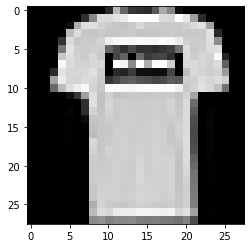

In [ ]:
import matplotlib.pyplot as plt

image = x_train[1,:,:]
print('this represent a : ' + true_label(y_train[1]))
plt.imshow(image, cmap='gray')

In [ ]:
import numpy as np

semilla = 10 
np.random.seed(seed= semilla)
muestra = np.random.randint(0, high= n_full, size=10000, dtype='int')  

# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

In [ ]:
#np.random.choice(data.ravel(),5,replace=False)
x_rfull = x_full[muestra]
y_rfull = y_full[muestra]

Target_name_train = np.vectorize(true_label)(y_train)
Target_name = np.vectorize(true_label)(y_full)
Target_namer = np.vectorize(true_label)(y_rfull)
Target_name_test = np.vectorize(true_label)(y_test)


Different samples of the dataset

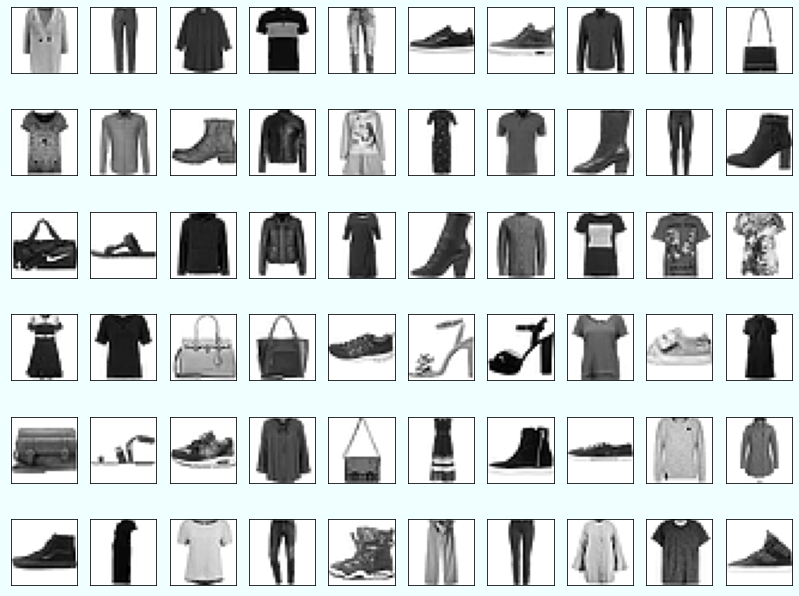

In [ ]:
fig, ax = plt.subplots(6, 10, figsize=(14, 11), facecolor= "azure")

for i, axi in enumerate(ax.flat):
    axi.imshow(x_rfull[i].reshape(28, 28), cmap='gray_r')
    axi.set(xticks=[], yticks=[])
    #axi.get_xaxis().set_visible(False)
    #axi.get_yaxis().set_visible(False)
#fig.subplots_adjust(hspace=0, vspace=0)

#fig.savefig('subset_fashion.png')

# Exploration and visualisation with **UMAP**

In [ ]:
import umap

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', titol=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=1997

    )
    u = fit.fit_transform(x_full);

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter( u[:,0], u[:,1], c= y_full, cmap=plt.cm.get_cmap('jet', 10), s=2, alpha=0.3,label=Target_name) 
    plt.setp(ax, xticks = [], yticks = [])
    ax.set_title('UMAP with true labels', fontsize=10)
    plt.title(titol, fontsize=18)

    cbar = plt.colorbar(boundaries = np.arange(11)-0.5, cmap=plt.cm.get_cmap('jet', 10))
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(noms)
    cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

    #plt.savefig("UMAP_fashion")
    plt.show()


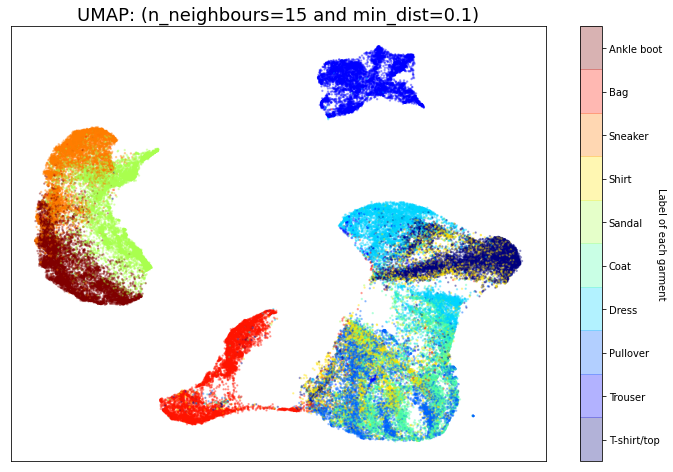

In [ ]:
draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', titol='UMAP: (n_neighbours=15 and min_dist=0.1)')

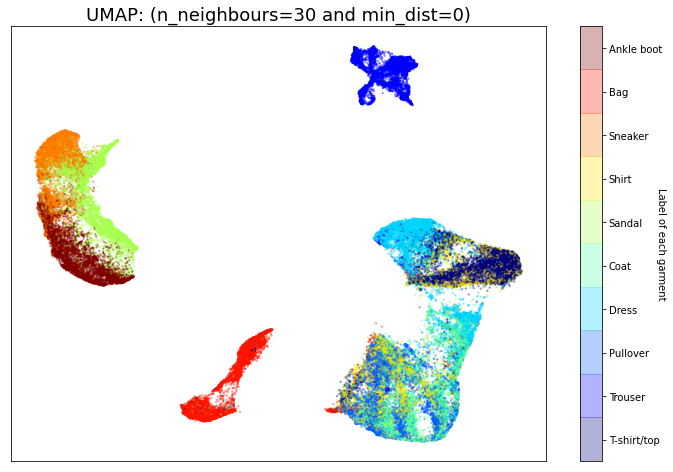

In [ ]:
draw_umap(n_neighbors=30, min_dist=0, n_components=2, metric='euclidean', titol='UMAP: (n_neighbours=30 and min_dist=0)')

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

#fit = umap.UMAP( n_neighbors= 25, min_dist= 0.1, n_components= 3, random_state=1997, verbose=2  )
#u = fit.fit_transform(x_rfull)
fig = plt.figure(figsize=(14, 11))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=y_rfull, cmap= plt.cm.get_cmap('jet', 10), alpha=0.2, s=15) # s=100, plt.cm.get_cmap('cubehelix', 6), plt.cm.get_cmap('jet', 10)
#plt.colorbar(ticks=range(10))
plt.title("UMAP with min_dist=0.1 and n_neighbours=25 ", fontsize=18)


In [ ]:
fitting = umap.UMAP(n_neighbors=30,min_dist=0,n_components=2,random_state=1997)
umap_2d = fitting.fit_transform(x_full)

In [ ]:
umap_2d.shape

(70000, 2)

In [ ]:
umap_2d[:,1]

array([ 3.9076104 ,  4.246808  ,  4.0593863 , ...,  0.76575553,
       12.025316  ,  8.665088  ], dtype=float32)

In [ ]:
np.where( umap_2d[:,1] < 1.5 )#, umap_2d[:,0] < 7) 

(array([    5,     7,    18, ..., 69991, 69992, 69997]),)



---



Reducción con clustering  
https://umap-learn.readthedocs.io/en/latest/clustering.html

**HDBSCAN: Hierarchical Density-Based Spatial Clustering of Applications with Noise**

In [ ]:
# Dimension reduction and clustering libraries
!pip install hdbscan

import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

*   **adjusted_rand_score**: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score  
*   **adjusted_mutual_info_score**: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn-metrics-adjusted-mutual-info-score  





# Clustering con KMEANS en los datos originales

In [ ]:
import time
time_start = time.time()

kmeans_raw = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997, init='k-means++', n_jobs=-1 ).fit(x_full) # x_rfull
kmeans_labels = kmeans_raw.labels_

print( 'k-means done! Time elapsed: {} seconds', time.time()-time_start )

k-means done! Time elapsed: {} seconds 72.0400116443634


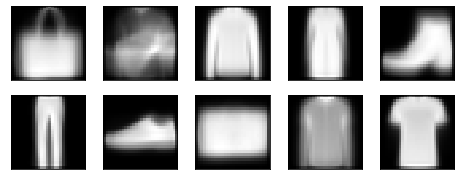

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_raw.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap="gray") #plt.cm.binary

#plt.savefig('kmeans_centers.png')

## K-means en output de 30D de UMAP



In [ ]:
fit = umap.UMAP(
        n_neighbors=25,
        min_dist=0,
        n_components=2,
        metric="euclidean",
        random_state=1997 )
embedding = fit.fit_transform(x_full)


In [ ]:
time_start = time.time()
fit_30 = umap.UMAP(
        n_neighbors=25,
        min_dist=0,
        n_components=30,
        metric="euclidean",
        random_state=1997 )
embedding_30 = fit_30.fit_transform(x_full)
print( 'UMAp done! Time elapsed: {} seconds', time.time()-time_start )

UMAp done! Time elapsed: {} seconds 332.29367232322693


In [ ]:
kmeans_labels_umap = cluster.KMeans(n_clusters=10, n_init=5, random_state=1997).fit_predict( embedding )
kmeans_labels_umap_30 = cluster.KMeans(n_clusters=10, n_init=5, random_state=1997).fit_predict( embedding_30 )

In [ ]:
def grafico(space, titol='', fitxer=''):

  fig, ax = plt.subplots(figsize=(12, 8))
  plt.scatter( space[:,0], space[:,1], c= y_train, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3,label=Target_name ) 
  plt.axis('off')


  ax.set_title( titol , fontsize=16)

  cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
  cbar.set_ticks(np.arange(10))
  cbar.set_ticklabels(noms)
  #cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

  fig.savefig( fitxer )
  plt.show()




In [ ]:
grafico(embedding, titol='UMAP: (n=30 dist=0)', fitxer='UMAP 2D')

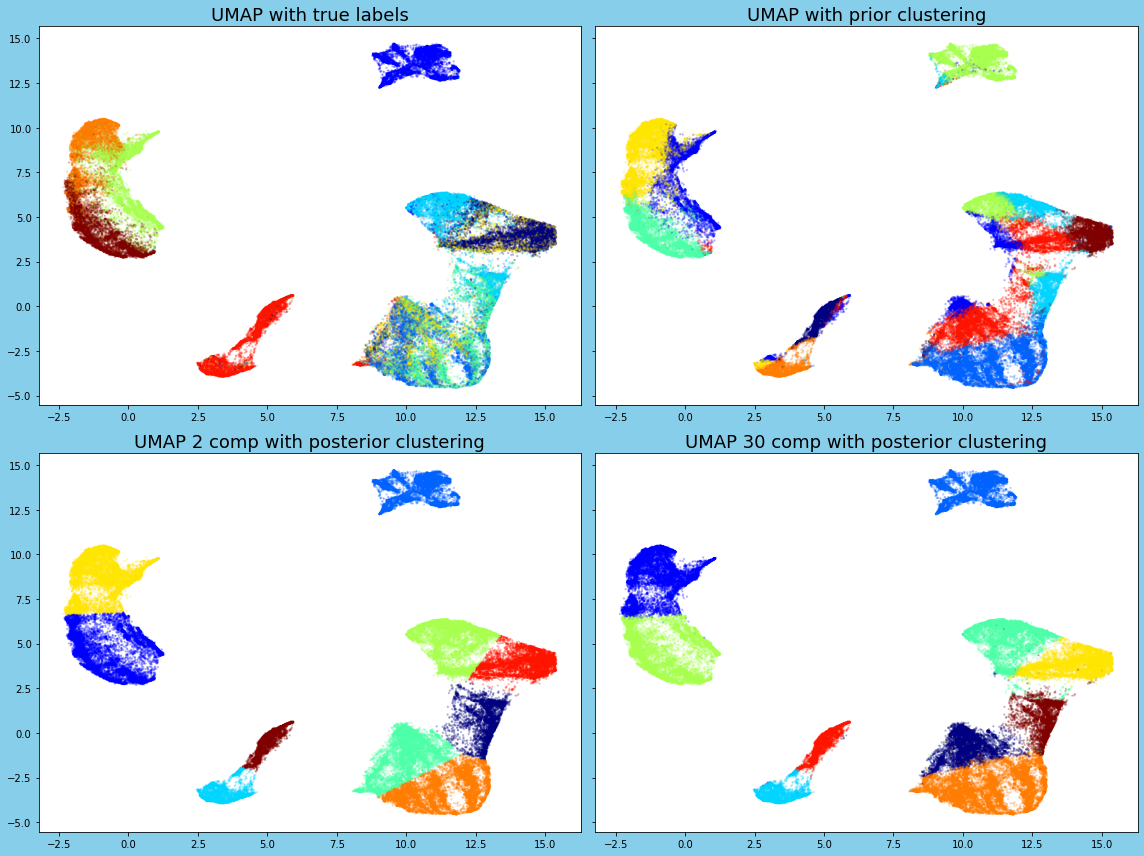

In [ ]:
#plt.style.use( "default" )

fig, axs = plt.subplots( nrows= 2, ncols= 2,sharey=True, facecolor= "skyblue",figsize=(16, 12)) #gridspec_kw={'hspace': 0, 'wspace': 0}
(ax1, ax2) , (ax3, ax4) = axs

im = ax1.scatter( embedding[:,0], embedding[:,1], c=y_full, cmap=plt.cm.get_cmap('jet', 10) , s= 2 , alpha=0.2) 
ax1.set_title('UMAP with true labels', fontsize=18)
ax2.scatter( embedding[:,0], embedding[:,1], c=kmeans_labels, cmap=plt.cm.get_cmap('jet', 10), s= 2, alpha=0.2)
ax2.set_title('UMAP with prior clustering',fontsize=18)
ax3.scatter( embedding[:,0], embedding[:,1], c=kmeans_labels_umap, cmap=plt.cm.get_cmap('jet', 10), s= 2, alpha=0.2)
ax3.set_title('UMAP 2 comp with posterior clustering',fontsize=18)
ax4.scatter( embedding[:,0], embedding[:,1], c=kmeans_labels_umap_30, cmap=plt.cm.get_cmap('jet', 10), s= 2, alpha=0.2)
ax4.set_title('UMAP 30 comp with posterior clustering',fontsize=18)

#cbar = fig.colorbar(im, ticks= range(10), use_gridspec=True, orientation='vertical' )
#cbar.ax.set_ylabel('Label of each garment')
#cbar.ax.set_yticklabels( noms )

fig.tight_layout()
#plt.colorbar(ticks=range(10), label='Label of each garment' )
#plt.show()
plt.savefig('umap_kmeans.png')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#( adjusted_rand_score(y_full, kmeans_labels), adjusted_mutual_info_score(y_full, kmeans_labels), )
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels) )
print( 'SIL:', silhouette_score(x_full, kmeans_labels) )

NMI: 0.5284531404464996
AMI: 0.5283323673973551
ARI: 0.38445331366713387
SIL: 0.15170476


In [ ]:
#( adjusted_rand_score(y_full, kmeans_labels_umap), adjusted_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_umap) )
print( 'SIL:', silhouette_score(x_full, kmeans_labels_umap) )

NMI: 0.643307307553911
AMI: 0.6432161848739049
ARI: 0.4800524268242437
SIL: 0.13201986


In [ ]:
#( adjusted_rand_score(y_full, kmeans_labels_umap_30), adjusted_mutual_info_score(y_full, kmeans_labels_umap_30) )
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_umap_30) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_umap_30) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_umap_30) )
print( 'SIL:', silhouette_score(x_full, kmeans_labels_umap_30) )

NMI: 0.6373864820290899
AMI: 0.6372947474832065
ARI: 0.4780827003466693
SIL: 0.08861612


In [ ]:
!pip install coclust
from coclust.evaluation.external import accuracy

In [ ]:
print( accuracy( y_full, kmeans_labels ) )
print( accuracy( y_full, kmeans_labels_umap ) )
print( accuracy( y_full, kmeans_labels_umap_30 ) )


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.5514714285714286
0.5746142857142857
0.5833428571428572


**min_samples**: The simplest intuition for what min_samples does is provide a measure of how conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.  


The primary parameter to effect the resulting clustering is **min_cluster_size**. Ideally this is a relatively intuitive parameter to select – set it to the smallest size grouping that you wish to consider a cluster. It can have slightly non-obvious effects however. 

# Clustering con HDBSCAN en los datos originales

In [ ]:
from sklearn.decomposition import PCA
time_start = time.time()

lowd_mnist = PCA(n_components=50).fit_transform(x_full)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(lowd_mnist) # cluster_selection_epsilon

print( 'hdbscan done! Time elapsed: {} seconds', time.time()-time_start )


hdbscan done! Time elapsed: {} seconds 104.71124744415283


In [ ]:
hdbscan_labels.labels_

array([-1, -1, -1, ..., -1,  0, -1])

In [ ]:
unique_elements, counts_elements = np.unique(hdbscan_labels.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1     0     1     2]
 [45203  5530  8454 10813]]


In [ ]:
clustered = hdbscan_labels.labels_ >= 0
( adjusted_rand_score( y_full[clustered], hdbscan_labels.labels_[clustered]  ), normalized_mutual_info_score(y_full[clustered], hdbscan_labels.labels_[clustered]) )

(0.4583162443836787, 0.6621158615684914)

In [ ]:
print( accuracy(y_full[clustered], hdbscan_labels.labels_[clustered]) )

0.5275638182038149


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
np.sum(clustered) / y_rfull.shape[0]

0.7413



---



## Clustering HDBSCAN con UMAP

https://hdbscan.readthedocs.io/en/latest/

In [ ]:
#time_start = time.time()

#clusterer = hdbscan.HDBSCAN(
#    min_samples=10,
#    min_cluster_size=500,
#).fit(x_full)

#print( 'hdbscan done! Time elapsed: {} seconds', time.time()-time_start )

# demasiado lento!

In [ ]:
clusterer_umap_2 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit(embedding)

In [ ]:
clusterer_umap_30 = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit(embedding_30)

In [ ]:
clusterer_umap_2.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [ ]:
clusterer_umap_2.condensed_tree_.plot()

In [ ]:
unique_elements, counts_elements = np.unique(clusterer_umap_2.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1     0     1     2     3     4     5]
 [   37 21008  6590  3575  3003 21642 14145]]


In [ ]:
unique_elements, counts_elements = np.unique(clusterer_umap_30.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1     0     1     2     3     4]
 [   45 21009  6593 35832  3597  2924]]


In [ ]:
clusterer_umap_2.labels_.max()+2

7

In [ ]:
clusterer_umap_2.probabilities_

array([1.        , 1.        , 0.86546807, ..., 0.97382661, 0.72899473,
       1.        ])

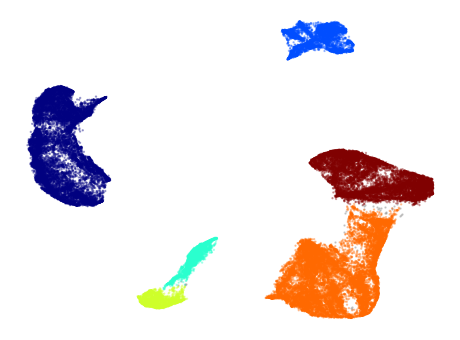

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
clustered2 = clusterer_umap_2.labels_ >= 0

ax.scatter( embedding[ ~clustered2 ,0], embedding[ ~clustered2 ,1], c= "gray" , s=2 ,alpha=0.3)  #(0.5, 0.5, 0.5)

ax.scatter( embedding[ clustered2,0], embedding[clustered2,1], c= clusterer_umap_2.labels_[clustered2] , 
                cmap=plt.cm.get_cmap('jet', clusterer_umap_2.labels_.max()+1), s=2 ,alpha=0.3) 
plt.axis('off')

plt.savefig('umap2_hdbscan.png')
plt.show()


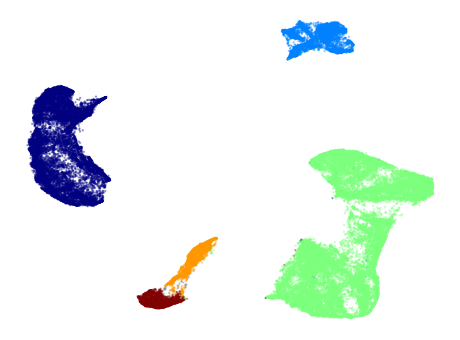

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
clustered30 = clusterer_umap_30.labels_ >= 0

ax.scatter( embedding[ ~clustered30 ,0], embedding[ ~clustered30 ,1], c= "gray" , s=2 ,alpha=0.3)  #(0.5, 0.5, 0.5)

ax.scatter( embedding[ clustered30,0], embedding[clustered30,1], c= clusterer_umap_30.labels_[clustered30] , 
                cmap=plt.cm.get_cmap('jet', clusterer_umap_30.labels_.max()+1), s=2 ,alpha=0.3) 
plt.axis('off')

plt.savefig('umap30_hdbscan.png')
plt.show()

Medidas de evaluacion

In [ ]:
#from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
print( '2 dimensions' )
print( 'NMI:', normalized_mutual_info_score(y_full, clusterer_umap_2.labels_) )
print( 'AMI:', adjusted_mutual_info_score(y_full, clusterer_umap_2.labels_) )
print( 'ARI:', adjusted_rand_score(y_full, clusterer_umap_2.labels_) )
#print( 'SIL:', silhouette_score(y_rfull, clusterer_umap_2.labels_) 

print( '30 dimensions' )
print( 'NMI:', normalized_mutual_info_score(y_full, clusterer_umap_30.labels_) )
print( 'AMI:', adjusted_mutual_info_score(y_full, clusterer_umap_30.labels_) )
print( 'ARI:', adjusted_rand_score(y_full, clusterer_umap_30.labels_) )

# Sin contar las observaciones que no tienen grupo
print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered2], clusterer_umap_2.labels_[clustered2]) )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered30], clusterer_umap_30.labels_[clustered30]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered2], clusterer_umap_2.labels_[clustered2]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered30], clusterer_umap_30.labels_[clustered30]) )

2 dimensions
NMI: 0.6415125297712209
AMI: 0.6414400004120033
ARI: 0.3968751755460086
30 dimensions
NMI: 0.6059112692095248
AMI: 0.6058384105057631
ARI: 0.28386014346282984
No grey observations
NMI: 0.6422358004158011
NMI: 0.6064422630670114
ARI: 0.397018844708548
ARI: 0.2839515156672588


Accuracy score

In [ ]:
#!pip install coclust
#from coclust.evaluation.external import accuracy
#coclust.evaluation.external.accuracy(true_row_labels, predicted_row_labels)
print( accuracy(y_full[clustered2], clusterer_umap_2.labels_[clustered2]) ) #0.5346 -Z 53%
print( accuracy(y_full[clustered30], clusterer_umap_30.labels_[clustered30]) )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.4361876992124409
0.3450360946322636


In [ ]:
np.sum(clustered) / y_full.shape[0]

0.9906

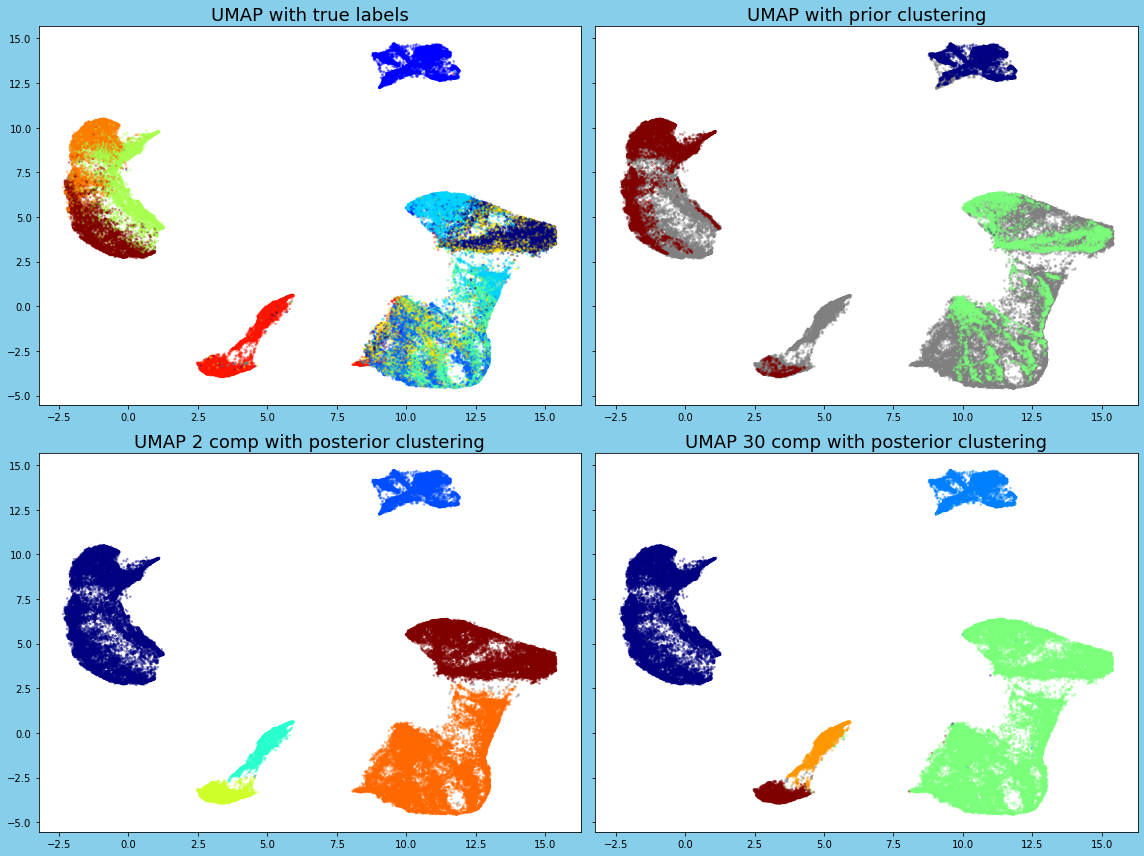

In [ ]:

fig, axs = plt.subplots( nrows= 2, ncols= 2,sharey=True, facecolor= "skyblue",figsize=(16, 12)) #gridspec_kw={'hspace': 0, 'wspace': 0}
(ax1, ax2) , (ax3, ax4) = axs

ax1.scatter( embedding[:,0], embedding[:,1], c=y_full, cmap=plt.cm.get_cmap('jet', 10) , s= 3 , alpha=0.3) 
ax1.set_title('UMAP with true labels', fontsize=18)

clustered = hdbscan_labels.labels_ >= 0
ax2.scatter( embedding[ ~clustered ,0], embedding[ ~clustered ,1], c= "gray" , s=3 ,alpha=0.3)  
ax2.scatter( embedding[ clustered,0], embedding[clustered,1], c= hdbscan_labels.labels_[clustered] , 
                cmap=plt.cm.get_cmap('jet', hdbscan_labels.labels_.max()+1), s=3 ,alpha=0.3) 
ax2.set_title('UMAP with prior clustering',fontsize=18)

#clustered3 = clusterer_umap_2.labels_ >= 0
ax3.scatter( embedding[ ~clustered2 ,0], embedding[ ~clustered2 ,1], c= "gray" , s=3 ,alpha=0.3) 
ax3.scatter( embedding[ clustered2,0], embedding[clustered2,1], c= clusterer_umap_2.labels_[clustered2] , 
                cmap=plt.cm.get_cmap('jet', clusterer_umap_2.labels_.max()+1), s=3 ,alpha=0.3) 
ax3.set_title('UMAP 2 comp with posterior clustering',fontsize=18)

#clustered4 = clusterer_umap_30.labels_ >= 0
ax4.scatter( embedding[ ~clustered30 ,0], embedding[ ~clustered30 ,1], c= "gray" , s=3 ,alpha=0.3) 
ax4.scatter( embedding[ clustered30,0], embedding[clustered30,1], c= clusterer_umap_30.labels_[clustered30] , 
#                cmap=plt.cm.get_cmap('jet', clusterer_umap_2.labels_.max()+1), s=3 ,alpha=0.3) 
#ax4.scatter( embedding[ :,0], embedding[:,1], c= clusterer_umap_30.labels_, 
                cmap=plt.cm.get_cmap('jet', clusterer_umap_30.labels_.max()+1), s=3 ,alpha=0.3) 
ax4.set_title('UMAP 30 comp with posterior clustering',fontsize=18)

#cbar = fig.colorbar(im, ticks= range(10), use_gridspec=True, orientation='vertical' )
#cbar.ax.set_ylabel('Label of each garment')
#cbar.ax.set_yticklabels( noms )

fig.tight_layout()
#plt.colorbar(ticks=range(10), label='Label of each garment' )
plt.savefig('umap_hdbscan.png')
plt.show()

#plt.savefig('cifar10_dog.png')

In [ ]:
clustered = clusterer_umap_2.labels_ >= 0

with np.printoptions(threshold= np.inf):  
    print(embedding[clustered])



---





---



# **PCA section**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#x_train_d_scaled = scale(x_train_d, axis=0)
# falta escalar los datos 

pca_2d = PCA(n_components=2)
pcax_2d = pca_2d.fit_transform(x_full)

In [ ]:
print( pca_2d.explained_variance_ratio_)
print( x_full.shape )
print( pcax_2d.shape )

[0.29056854 0.177387  ]
(70000, 784)
(70000, 2)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca_50d = PCA(n_components=50)
pcax_50d = pca_50d.fit_transform(x_full)

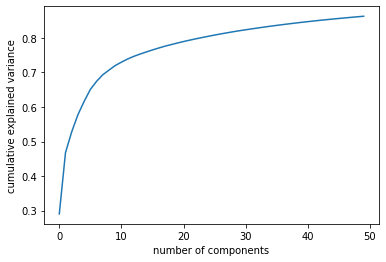

In [ ]:
plt.plot(np.cumsum(pca_50d.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.savefig("Scree_plot")
plt.show()

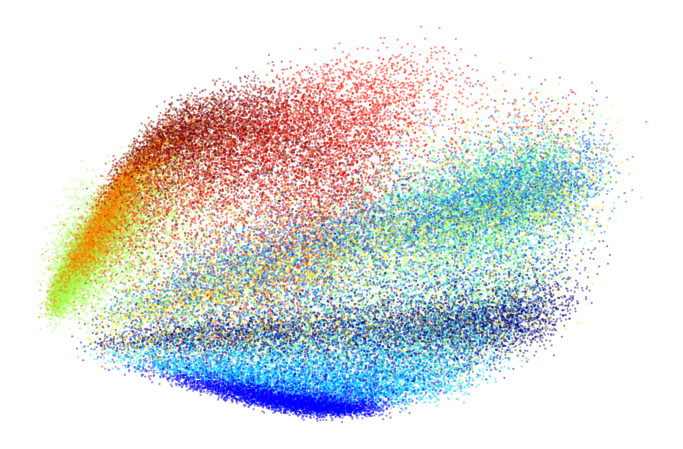

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( pcax_2d[:,0], pcax_2d[:,1], c= y_full, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3,label=Target_name ) 
plt.axis('off')
#ax.set_title( 'PCA_fashion' , fontsize=16)
fig.savefig( 'PCA_fashion' )
plt.show()

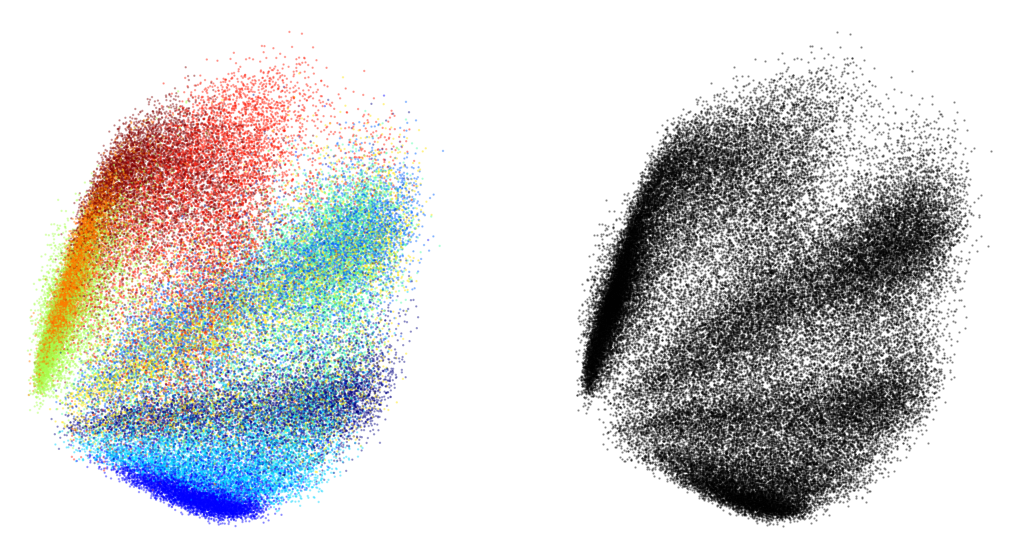

In [ ]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)
fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

ax1.scatter( pcax_2d[:,0], pcax_2d[:,1], c= y_full, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3,label=Target_name ) 
#ax1.set_title('PCA with true labels', fontsize=14)
ax1.axis('off')


ax2.scatter( pcax_2d[:,0], pcax_2d[:,1],  c= "black", s=2 ,alpha=0.3,label=Target_name ) 
ax2.axis('off')
#ax2.set_title('PCA without labels', fontsize=14)


#plt.title("titol", fontsize=18)
#plt.legend(Target_name, y_rfull)
fig.savefig( 'PCA_fashion' )
plt.show()

#plt.savefig('cifar10_dog.png')



---





---



# **T-SNE section**

In [ ]:
from sklearn.manifold import TSNE

tsne1 = TSNE( n_components= 2, perplexity= 25.0, learning_rate= 10.0, n_iter=5000, random_state= semilla, n_iter_without_progress=200 )


In [ ]:
#import time
time_start = time.time()

tsne_results = tsne1.fit_transform(x_rfull)

print( 't-SNE done! Time elapsed: {} seconds', time.time()-time_start )

t-SNE done! Time elapsed: {} seconds 600.4053189754486


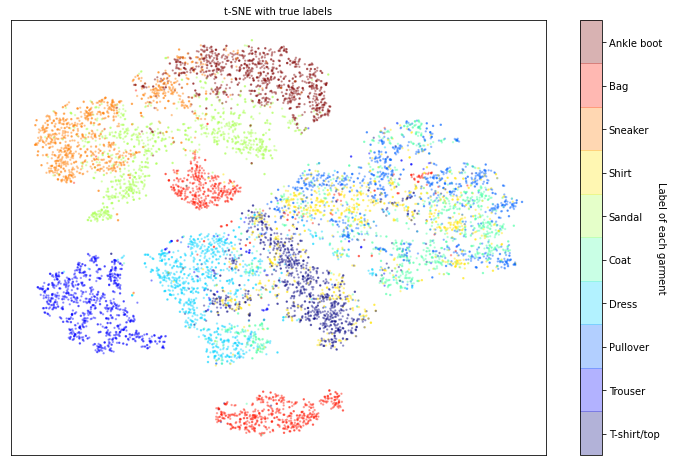

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
#fig = plt.figure()
#ax = fig.add_subplot(111)
#fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
plt.scatter( tsne_results[:,0], tsne_results[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3,label=Target_namer ) 
plt.setp(ax, xticks = [], yticks = [])
ax.set_title('t-SNE with true labels', fontsize=10)

#plt.figure(figsize=(12, 10))
cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(noms)
cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

#plt.title("titol", fontsize=18)
#plt.legend(Target_name, y_rfull)
plt.show()

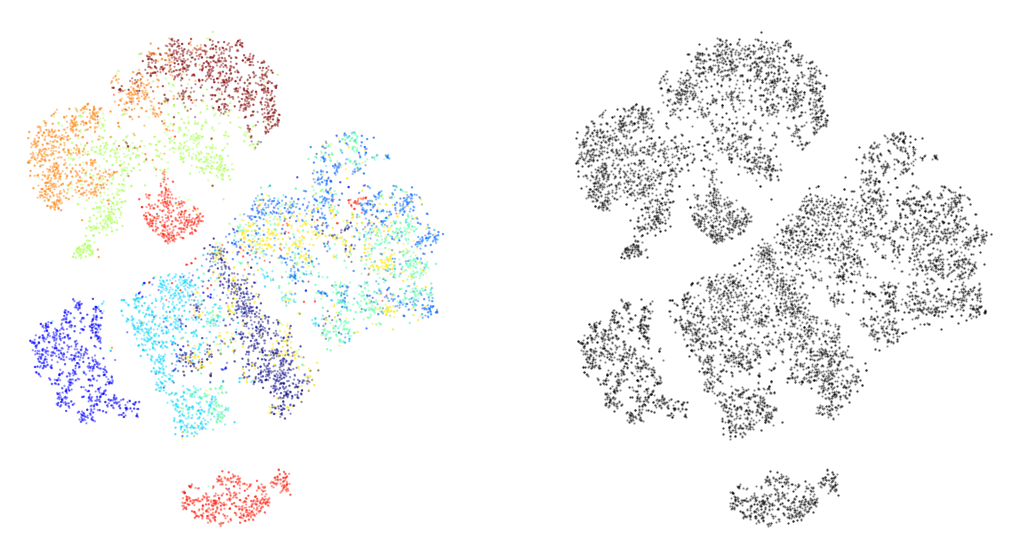

In [ ]:
fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

ax1.scatter( tsne_results[:,0], tsne_results[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3, label=Target_namer ) 
ax1.axis('off')

ax2.scatter( tsne_results[:,0], tsne_results[:,1],  c= "black", s=2 ,alpha=0.3,label=Target_name ) 
ax2.axis('off')

fig.savefig( 'tsne_fashion' )
plt.show()

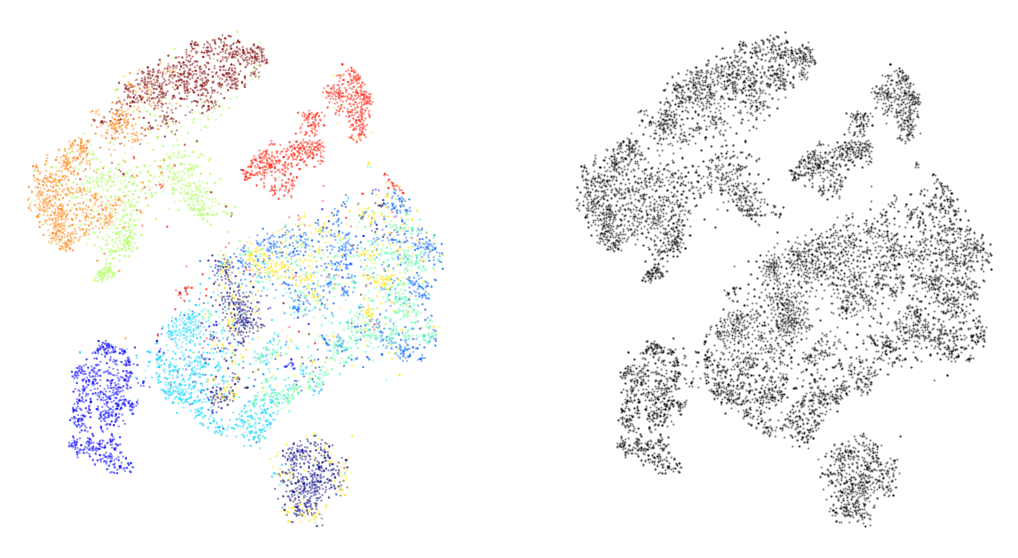

In [ ]:
tsne2 = TSNE( n_components= 2, perplexity= 50.0, learning_rate= 10.0, n_iter=5000, random_state= semilla, n_iter_without_progress=200 )
tsne_results = tsne2.fit_transform(x_rfull)

fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

ax1.scatter( tsne_results[:,0], tsne_results[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3, label=Target_namer ) 
ax1.axis('off')

ax2.scatter( tsne_results[:,0], tsne_results[:,1],  c= "black", s=2 ,alpha=0.3,label=Target_name ) 
ax2.axis('off')

fig.savefig( 'tsne_fashion' )
plt.show()

tsne + kmeans

In [ ]:
kmeans_raw_tsne = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997, init='k-means++', n_jobs=-1 ).fit(tsne_results) # x_rfull
kmeans_tsne = kmeans_raw_tsne.labels_

In [ ]:
print( '2 dimensions' )
print( 'NMI:', normalized_mutual_info_score(y_rfull, kmeans_tsne) )
print( 'AMI:', adjusted_mutual_info_score(y_rfull, kmeans_tsne) )
print( 'ARI:', adjusted_rand_score(y_rfull, kmeans_tsne) )
print( 'ACC:', accuracy(y_rfull, kmeans_tsne) )
#print( 'SIL:', silhouette_score(y_rfull, kmeans_tsne)  )


2 dimensions
NMI: 0.5842103860615369
AMI: 0.5834727539600013
ARI: 0.45028305835382515
ACC: 0.6163


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)




---






---






---



# **Autoencoders**



---





---



In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend 
from keras import regularizers

import tensorflow as tf

In [ ]:

input_img = Input(shape=(28, 28, 1), name='input')  # adapt this if using `channels_first` image data format

x = Conv2D(24, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x =Conv2D(10, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
encoded = MaxPooling2D((2, 2), padding='same',name='embedding')(x)
#x = Flatten(name='embedding')(x)

###

#x = Reshape( (3,3,128) )(encoded)
x = UpSampling2D((2, 2))(encoded)
x = Conv2D(10, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (2, 2), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((3, 3))(x)
x = Conv2D(20, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(24, (3, 3), strides=(1, 1), padding='valid', activation="relu")(x)
decoded = Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='valid', activation='sigmoid',name='output')(x)

CAE_f = Model(input_img, decoded)

CAE_f.summary()

In [ ]:
tf.keras.utils.plot_model(
    CAE_f,
    to_file="CAE_f_plot.png", # lo guarda en este documento
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)




---



Separar el modelo en **Encoder-Decoder**

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name='original_image')  
x = Conv2D(24, (3, 3), padding='same')(encoder_input)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x =Conv2D(10, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

encoder_output = MaxPooling2D((2, 2), padding='same',name='embedding')(x)

encoder = Model(encoder_input, encoder_output, name='encoder')

In [ ]:
decoder_input = Input(shape=(1,1,10), name='encoded_image')

x = UpSampling2D((2, 2))(decoder_input)
x = Conv2D(10, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (2, 2), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((3, 3))(x)
x = Conv2D(20, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(24, (3, 3), strides=(1, 1), padding='valid', activation="relu")(x)

decoder_output = Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='valid', activation='sigmoid',name='output')(x)

decoder = Model(decoder_input, decoder_output, name='decoder')

In [ ]:
decoder.summary()

In [ ]:
autoencoder_input = Input(shape=(28, 28, 1), name="image")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
CAE_separated = Model(autoencoder_input, decoded_img, name="CAE_separated")
CAE_separated.summary()

Model: "CAE_separated"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 1, 1, 10)          10306     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         10247     
Total params: 20,553
Trainable params: 20,553
Non-trainable params: 0
_________________________________________________________________


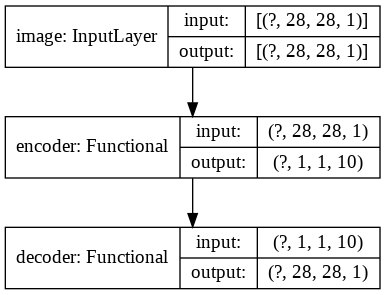

In [ ]:
tf.keras.utils.plot_model( encoder, to_file="encoder_plot.png", show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model( decoder, to_file="decoder_plot.png", show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model( CAE_separated, to_file="CAE_separated_plot.png", show_shapes=True, show_layer_names=True)



---



In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping
from  keras.optimizers import Adam


opt = Adam(learning_rate=0.005, epsilon=0.1)

CAE_f.compile(optimizer= opt, loss='binary_crossentropy',metrics=['mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
historyC10 = CAE_f.fit(x_train_c, x_train_c,
                epochs=400,
                batch_size=256,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c),
                verbose=1)


In [ ]:
#############

def plot_results( history_NN, min_epoch ):
  max_epoch = len( history_NN.history["val_loss"] )
  val_loss = history_NN.history["val_loss"][min_epoch:max_epoch]
  train_loss = history_NN.history["loss"][min_epoch:max_epoch]
  epochs = range(min_epoch, max_epoch)

  plt.plot( epochs , val_loss, 'b', label='Validation loss') 
  plt.plot( epochs , train_loss, 'b+', label='Training loss') 
  plt.title('Training and validation loss') 
  plt.xlabel('Epochs')
  plt.ylabel('Binary CE')
  plt.legend()

  plt.savefig("training_plot")
  plt.show()

###############
  
#plot_results( historyC10, 9 ) 


In [ ]:
CAE_f.save('CAE10adv_fashion.h5')
# Load the model:
# a) keras.models.load_model('clust11.h5') 
# b) autoencoder_c = load_model('clust11.h5')

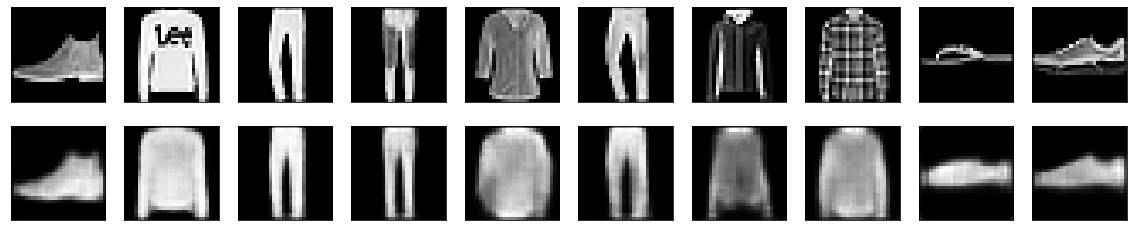

In [ ]:
predM = CAE_f.predict(x_test_c)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predM[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.savefig("reconstruction_images")
plt.show()

Visualización de la reconstrucción del input



---



# Clustering de la CAE 10

In [ ]:
layer_name = 'embedding'
intermediate_layer_model = Model(inputs=CAE_f.input,
                                 outputs=CAE_f.get_layer(layer_name).output)
embedded_layer = intermediate_layer_model.predict(x_test)
print( embedded_layer.shape )

(10000, 1, 1, 10)


In [ ]:
embedded_layer = embedded_layer.reshape(10000,10)

In [ ]:
kmeans_labels_CAE.shape

(10000,)

In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
!pip install coclust
from coclust.evaluation.external import accuracy

In [ ]:
kmeans_labels_CAE = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( embedded_layer ) # embedded layer

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_test, kmeans_labels_CAE) )
print( 'AMI:', adjusted_mutual_info_score(y_test, kmeans_labels_CAE) )
print( 'ARI:', adjusted_rand_score(y_test, kmeans_labels_CAE) )
print( 'ACC:', accuracy(y_test, kmeans_labels_CAE) )
print( 'SIL:', silhouette_score(x_test_d, kmeans_labels_CAE) )

NMI: 0.48623116118200055
AMI: 0.48531707004835395
ARI: 0.3209213770153575
ACC: 0.5087


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


SIL: 0.09880054




---





---



# **Autoencoder basado en el ejemplo de chollet**
Try autoencoder 128 dim + UMAP to create the visualisation

Fuente: https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
#! tensorboard --logdir sample_data

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping
callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

history = autoencoder.fit(x_train_c, x_train_c,
                epochs=400,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_c, x_test_c),
                callbacks=callbacks_list)


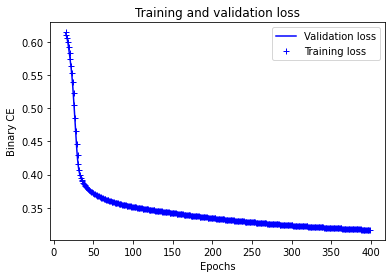

In [ ]:
plot_results( history, 15 ) 

In [ ]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [ ]:
feature_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(name='max_pooling2d_2').output)
features = feature_model.predict(x)
print('feature shape=', features.shape)

feature shape= (70000, 4, 4, 8)


In [ ]:
features = np.reshape(features, newshape=(features.shape[0], -1))
print('feature shape=', features.shape)

feature shape= (70000, 128)


In [ ]:
from umap import UMAP
fitting = UMAP(n_neighbors=15,min_dist=0.1,n_components=2,random_state=1997)
umap_2d = fitting.fit_transform(features)

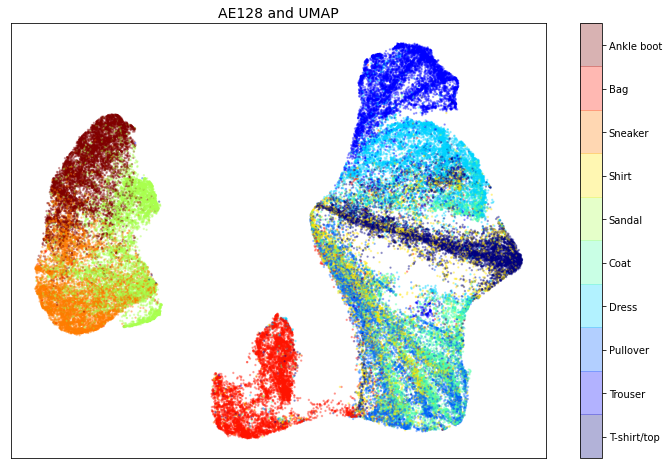

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( umap_2d[:,0], umap_2d[:,1], c= y, cmap=plt.cm.get_cmap('jet', 10), s=2, alpha=0.3,label=Target_name) 
plt.setp(ax, xticks = [], yticks = [])
ax.set_title('AE128 and UMAP', fontsize=14)
#plt.title(titol, fontsize=18)

cbar = plt.colorbar(boundaries = np.arange(11)-0.5, cmap=plt.cm.get_cmap('jet', 10))
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(noms)
#cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

fig.savefig( 'AE128_UMAP2' )
plt.show()

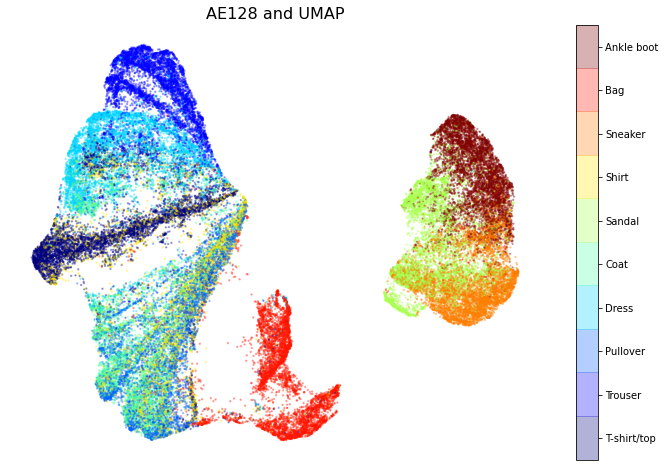

In [ ]:
grafico( umap_2d, titol="AE128 and UMAP" , fitxer="AE128_UMAP2"  )



---





---



# Otra estructura de CAE
Comparar CAE con el propuesto en el paper de DCEC Guo et.al.


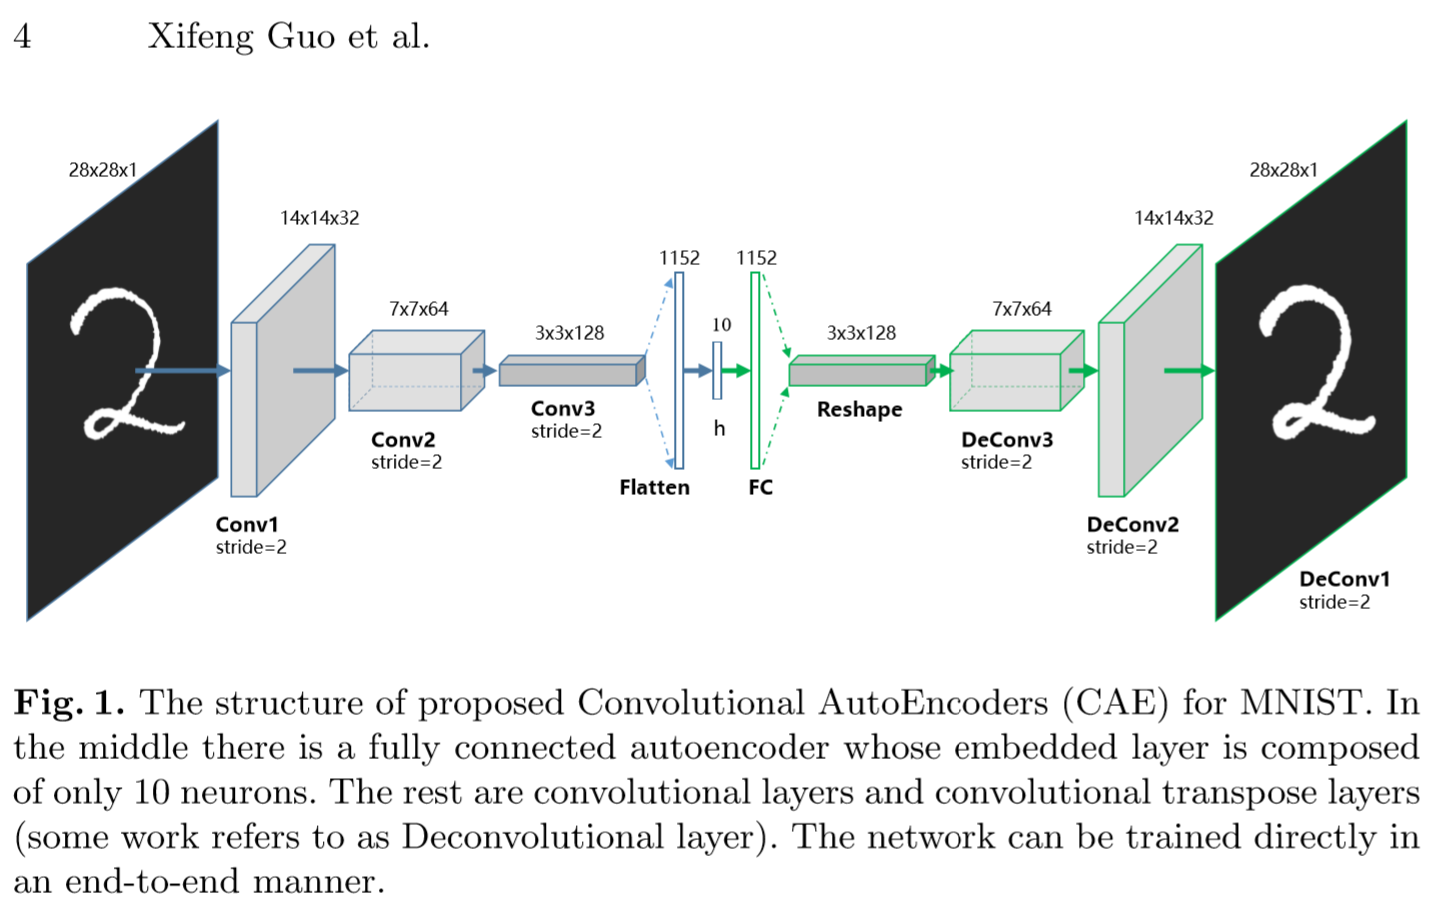

In [ ]:
from IPython.display import Image
Image('/CAE_XifenGuo.png', width=862, height=540)

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, Flatten, Reshape 
# hay que añadir los dos ultimos (Flatten, Reshape)
from tensorflow.keras.models import Model
from tensorflow.keras import backend 

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', name="Conv1" )(input_img)
x = LeakyReLU(alpha=5)(x)
x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name="Conv2" )(x)
x = LeakyReLU(alpha=5)(x)
x = Conv2D(128, (3, 3), strides=(2, 2), padding='valid', name="Conv3" )(x)
x = LeakyReLU(alpha=5)(x)
x = Flatten( name="Flatten")(x)
encoded = Dense( 10, activation='relu', name="Embedding" )(x)

###

x = Dense( 1152, activation='relu' , name="FC" )(encoded)
x = Reshape( (3,3,128) , name="Reshape")(x)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='valid', name="Deconv3")(x) # importante, unico que tiene valid
x = LeakyReLU(alpha=5)(x)
x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', name="Deconv2")(x)
x = LeakyReLU(alpha=5)(x)
decoded = Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid', name="Deconv1")(x)

autoencoder_c2 = Model(input_img, decoded)

autoencoder_c2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 64)          18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 3, 3, 128)        

In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

autoencoder_c2.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mae','mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
history_c2 = autoencoder_c2.fit(x_train_c, x_train_c,
                epochs=400,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c)  )

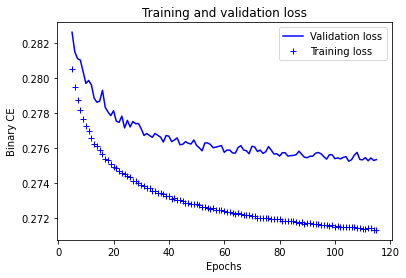

In [ ]:
plot_results( history_c2, 5 ) 

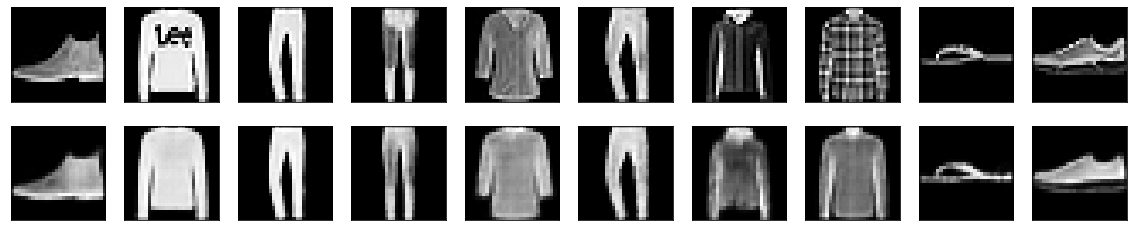

In [ ]:
predM = autoencoder_c2.predict(x_test_c)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predM[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.savefig("reconstruction_images")
plt.show()

**For visualisation**

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, Flatten, Reshape 
# hay que añadir los dos ultimos (Flatten, Reshape)
from tensorflow.keras.models import Model
from tensorflow.keras import backend 

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', name="Conv1" )(input_img)
x = LeakyReLU(alpha=5)(x)
x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name="Conv2" )(x)
x = LeakyReLU(alpha=5)(x)
x = Conv2D(128, (3, 3), strides=(2, 2), padding='valid', name="Conv3" )(x)
x = LeakyReLU(alpha=5)(x)
x = Flatten( name="Flatten")(x)
encoded = Dense( 2, activation='relu', name = "Embedding" )(x)

###

x = Dense( 1152, activation='relu' , name="FC" )(encoded)
x = Reshape( (3,3,128) , name="Reshape")(x)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='valid', name="Deconv3")(x) # importante, unico que tiene valid
x = LeakyReLU(alpha=5)(x)
x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', name="Deconv2")(x)
x = LeakyReLU(alpha=5)(x)
decoded = Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid', name="Deconv1")(x)

autoencoder_c2 = Model(input_img, decoded)

#autoencoder_c2.summary()

In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

autoencoder_c2.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mae','mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
history_c2 = autoencoder_c2.fit(x_train_c, x_train_c,
                epochs=150,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c)  )

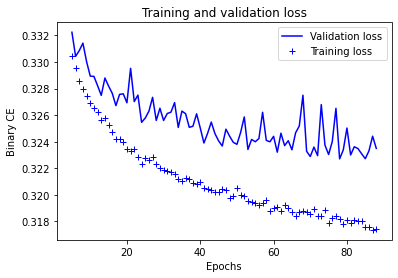

In [ ]:
plot_results( history_c2, 5 ) 

In [ ]:

intermediate_layer_model = Model(inputs=autoencoder_c2.input,
                                 outputs=autoencoder_c2.get_layer('Embedding').output)
embedded_layer = intermediate_layer_model.predict(x_test_c)
print( embedded_layer.shape )

(10000, 2)


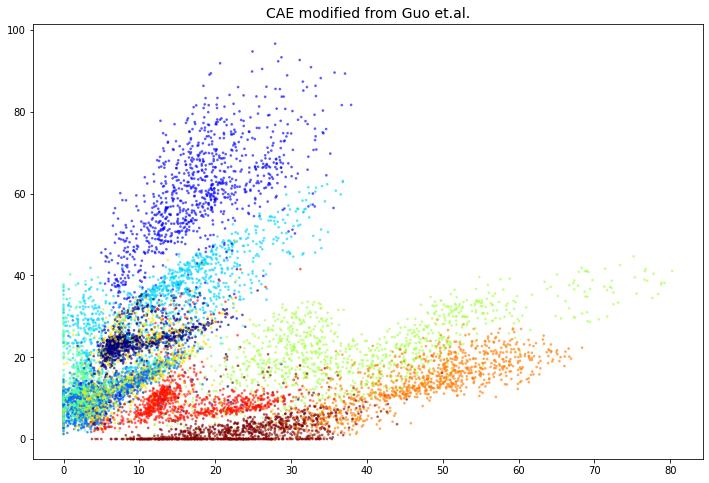

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( embedded_layer[:,0], embedded_layer[:,1], c= y_test, cmap=plt.cm.get_cmap('jet', 10), s=3, alpha=0.5) 
#plt.setp(ax, xticks = [], yticks = [])
ax.set_title('CAE modified from Guo et.al.', fontsize=14)
plt.savefig('CAE_Guo_vis')



---



# CAE 2D para visualizacion

In [ ]:
input_img = Input(shape=(28, 28, 1), name='input')  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense( 2, activation='relu' ,name="embedded" )(x)

# at this point the representation is 2 dimensional

x = Dense( 128, activation='relu' )(encoded)
x = Reshape( (4,4,8) )(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

CAE_f = Model(input_img, decoded)

CAE_f.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

CAE_f.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mean_squared_error']) # experimental_steps_per_execution = 10

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
historyC = CAE_f.fit(x_train_c, x_train_c,
                epochs=120,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c),
                verbose=1)

In [ ]:
#############

def plot_results( history_NN, min_epoch ):
  max_epoch = len( history_NN.history["val_loss"] )
  val_loss = history_NN.history["val_loss"][min_epoch:max_epoch]
  train_loss = history_NN.history["loss"][min_epoch:max_epoch]
  epochs = range(min_epoch, max_epoch)

  plt.plot( epochs , val_loss, 'b', label='Validation loss') 
  plt.plot( epochs , train_loss, 'b+', label='Training loss') 
  plt.title('Training and validation loss') 
  plt.xlabel('Epochs')
  plt.ylabel('Binary CE')
  plt.legend()

  plt.savefig("training_plot")
  plt.show()

###############
  
  
#plot_results( historyC, 5 ) 


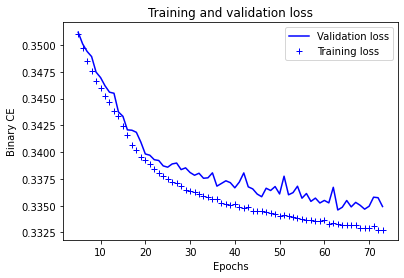

In [ ]:
plot_results( historyC, 5 ) 


In [ ]:
autoencoder_c.save('CAE1_fashion.h5')

Hacer grafico 2D

In [ ]:

intermediate_layer_model = Model(inputs=CAE_f.input,
                                 outputs=CAE_f.get_layer(name='embedded').output)
feature_space = intermediate_layer_model.predict(x_test_c) # se hace con los 10mil datos del test

In [ ]:
#feature_space = np.reshape(feature_space, newshape=(10000, 10)).copy()
feature_space.shape


(10000, 2)

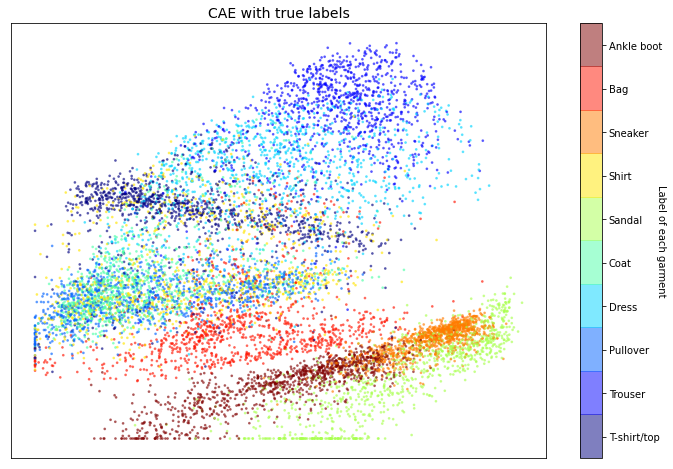

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( feature_space[:,0], feature_space[:,1], c= y_test, cmap=plt.cm.get_cmap('jet', 10), s=3, alpha=0.5,label=Target_name_test) 
plt.setp(ax, xticks = [], yticks = [])
ax.set_title('CAE with true labels', fontsize=14)
#plt.title(titol, fontsize=18)

cbar = plt.colorbar(boundaries = np.arange(11)-0.5, cmap=plt.cm.get_cmap('jet', 10))
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(noms)
cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

fig.savefig( 'CAE_2d_fashion' )
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

ax1.scatter( tsne_results[:,0], tsne_results[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3, label=Target_namer ) 
ax1.axis('off')

ax2.scatter( tsne_results[:,0], tsne_results[:,1],  c= "black", s=2 ,alpha=0.3,label=Target_name ) 
ax2.axis('off')

fig.savefig( 'tsne_fashion' )
plt.show()

https://www.kaggle.com/eliotbarr/fashion-mnist-tutorial

# Autoencoders + tsne30

In [ ]:
input_img = Input(shape=(28, 28, 1), name='input')  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense( 30, activation='relu' ,name="embedded" )(x)

# at this point the representation is 2 dimensional

x = Dense( 128, activation='relu' )(encoded)
x = Reshape( (4,4,8) )(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

CAE_30d = Model(input_img, decoded)

CAE_30d.summary()

In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

CAE_30d.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
historyC30 = CAE_30d.fit(x_train_c, x_train_c,
                epochs=120,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c),
                verbose=1)

In [ ]:

intermediate_layer_model = Model(inputs=CAE_f.input,
                                 outputs=CAE_f.get_layer(name='embedded').output)
feature_space_30 = intermediate_layer_model.predict(x_test_c)

In [ ]:
feature_space_30.shape

(10000, 30)

In [ ]:
from sklearn.manifold import TSNE

tsne1 = TSNE( n_components= 2, perplexity= 25.0, learning_rate= 10.0, n_iter=5000, random_state= semilla, n_iter_without_progress=200 )
tsne_results = tsne1.fit_transform(feature_space_30)


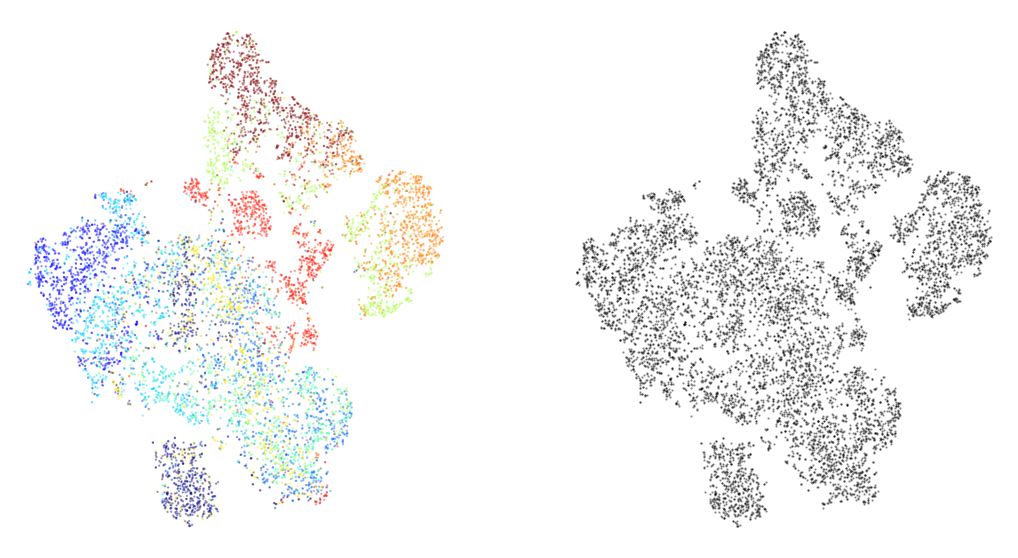

In [ ]:
fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

ax1.scatter( tsne_results[:,0], tsne_results[:,1], c= y_test, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3,label=Target_name ) 
#ax1.set_title('PCA with true labels', fontsize=14)
ax1.axis('off')


ax2.scatter( tsne_results[:,0], tsne_results[:,1],  c= "black", s=2 ,alpha=0.3,label=Target_name ) 
ax2.axis('off')
#ax2.set_title('PCA without labels', fontsize=14)


#plt.title("titol", fontsize=18)
#plt.legend(Target_name, y_rfull)
#fig.savefig( 'CAE +' )
plt.show()

#plt.savefig('cifar10_dog.png')